<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>📦 Sesión práctica 3: Análisis Multivariado</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_3_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [ ]:
# Solicitar datos al estudiante
nombre = input("Ingresa tu nombre completo: ")
correo = input("Ingresa tu correo electrónico: ")

# Mostrar los datos ingresados
print("\nResumen de datos ingresados:")
print(f"Nombre: {nombre}")
print(f"Correo electrónico: {correo}")

Ingresa tu nombre completo: Isaac Esteban Uribe Jaramillo
Ingresa tu correo electrónico: isaac.uribej@udea.edu.co

Resumen de datos ingresados:
Nombre: Isaac Esteban Uribe Jaramillo
Correo electrónico: isaac.uribej@udea.edu.co


## <span style="color:black;"><strong>Parte 3: Análisis Multivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio1: Análisis de componentes principales</strong></span>

A partir de un conjunto de datos real sobre pingüinos antárticos, realiza un análisis multivariado utilizando PCA para reducir la dimensionalidad y visualizar agrupamientos por especie.

1. Carga el conjunto de datos penguins desde la librería seaborn `load_dataset("penguins")`.
2. Selecciona las siguientes variables morfológicas para el análisis:
   - 'bill_length_mm'
   - 'bill_depth_mm'
   - 'flipper_length_mm'
   - 'body_mass_g'
3. Estandariza las variables seleccionadas usando StandardScaler.
4. Aplica PCA()
5. Imprime las ecuaciones que obtuviste para el número de componentes que utilizaste
6. Grafica los resultados en un plano bidimensional (PC1 vs PC2), diferenciando por especie (ver imagen).
7. Interpreta visualmente qué especies se agrupan o separan mejor en el espacio reducido.

<p align="center">
    <img src="imgs\sp_3_e1.png" alt="sp_3_e1" width="600"  height="400">
</p>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#Cargamos desde la libreria seaborn load_dataset("penguins")
penguins = sns.load_dataset("penguins")
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
#Visualizar el numero de specias con valores distintos
penguins['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


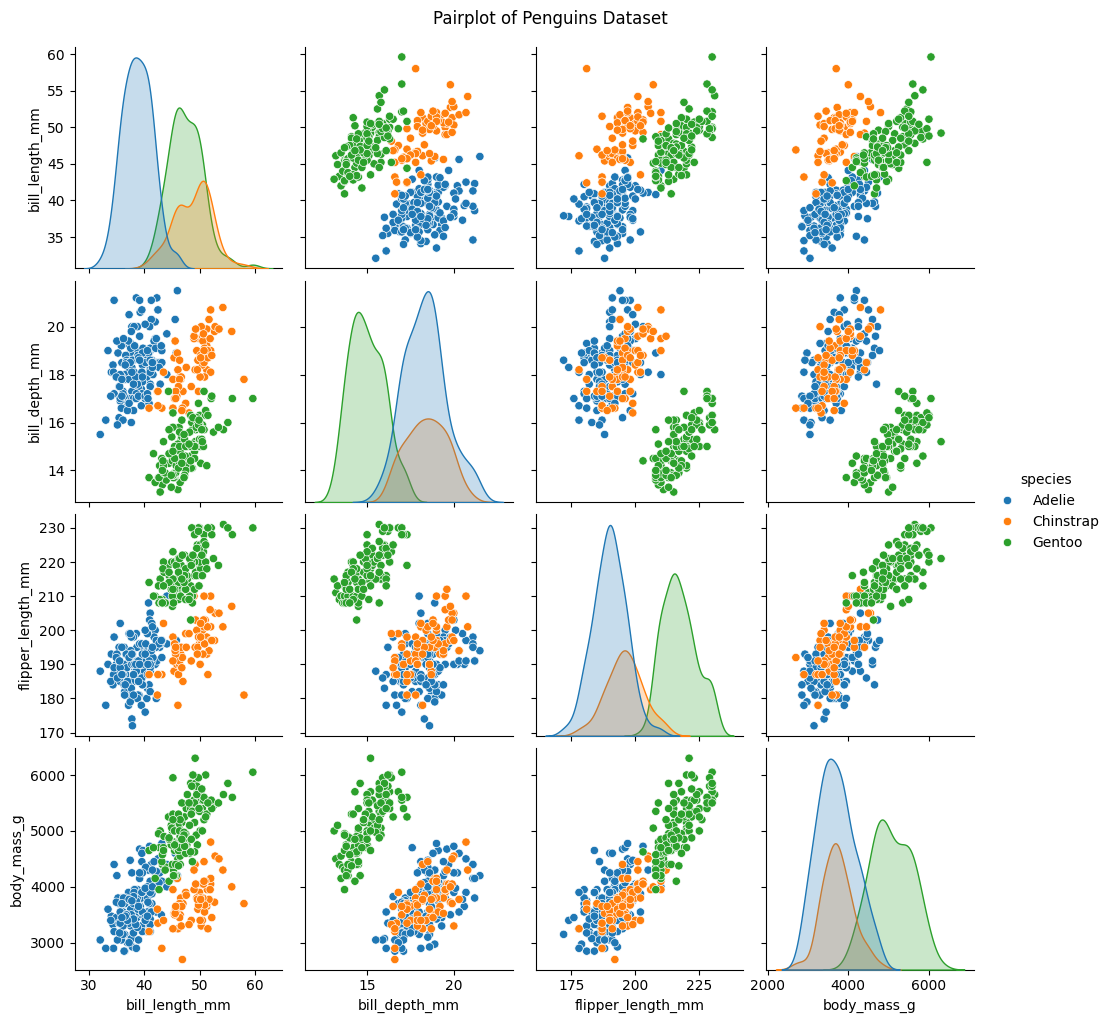

In [ ]:
# Merge species
penguins_species = penguins.copy()
species = penguins['species']
penguins_species['species'] = species.dropna().reset_index(drop=True)

#Graficamos la matriz de dispersion
sns.pairplot(penguins_species, hue='species')
plt.suptitle('Pairplot of Penguins Dataset', y=1.02)
plt.show()

In [ ]:
#Cargamos desde la libreria seaborn load_dataset("penguins")
penguins = sns.load_dataset("penguins")
# Store the species information before dropping columns
species = penguins['species']
penguins = penguins.drop(columns=["species", "island", "sex"])
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


En este apartado elegiremos 3 componentes debido a que en primera instancia al observar los valores dentro de la columna 'spicies' nos encontramos con que hay 3 valores distintos: Adelie, Gentoo y Chinstrap; por lo tanto lo mas probable es que en el **mejor** de los casos se creen 3 clusters  


In [ ]:
#Estandarizamos las variables
scaler = StandardScaler()
# Drop valores NaN
penguins_cleaned = penguins.dropna()
penguins_scaled = scaler.fit_transform(penguins_cleaned)
#Aplicamos PCA
pca = PCA(n_components=3)
pca.fit(penguins_scaled)

PCA(n_components=3)

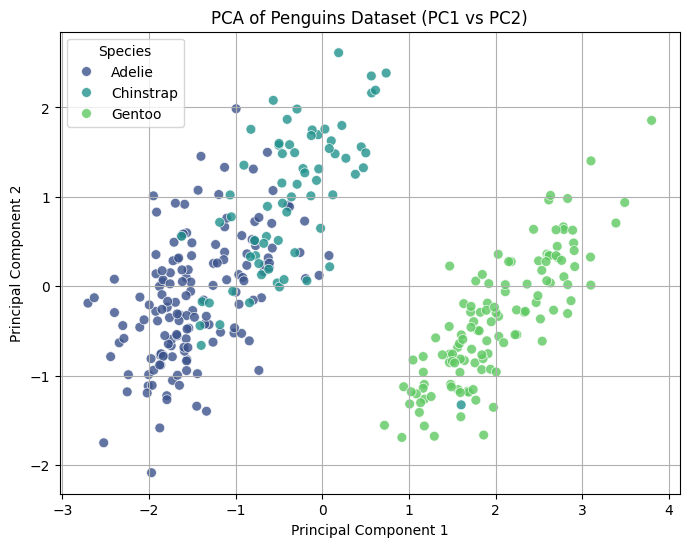

In [ ]:
# Project the data onto the first two principal components
X_pca = pca.transform(penguins_scaled)[:, :2]

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
pca_df['species'] = species.dropna().reset_index(drop=True) # Align species with cleaned data

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='viridis', s=50, alpha=0.8)
plt.title('PCA of Penguins Dataset (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.grid(True)
plt.show()

En esta grafica se peude observar que la especie Gentoo se separa mejor de los otras dos especias, que se superponen bastante y son un poco dificiles de "diferencar" o separar mediante una descomposicion de variables principales, esto se puede deber a que las caracteristicas de ambos sean similares numericamente

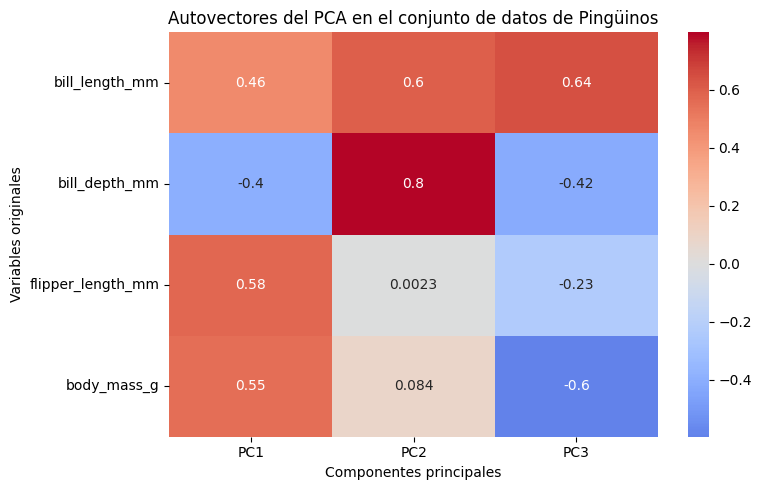

In [ ]:
componentes = pd.DataFrame(pca.components_.T,
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                           index=penguins_cleaned.columns)

# 📐 Visualización de autovectores
plt.figure(figsize=(8, 5))
sns.heatmap(componentes, annot=True, cmap='coolwarm', center=0)
plt.title('Autovectores del PCA en el conjunto de datos de Pingüinos')
plt.ylabel('Variables originales')
plt.xlabel('Componentes principales')
plt.tight_layout()
plt.show()

In [ ]:
# Extract and print the equations for the principal components
print("Equations for the principal components:")
for i, component in enumerate(pca.components_):
    print(f"PC{i+1} = ", end="")
    for j, loading in enumerate(component):
        print(f"{loading:.3f} * {penguins_cleaned.columns[j]}", end="")
        if j < len(component) - 1:
            print(" + ", end="")
    print()

Equations for the principal components:
PC1 = 0.455 * bill_length_mm + -0.400 * bill_depth_mm + 0.576 * flipper_length_mm + 0.548 * body_mass_g
PC2 = 0.597 * bill_length_mm + 0.798 * bill_depth_mm + 0.002 * flipper_length_mm + 0.084 * body_mass_g
PC3 = 0.644 * bill_length_mm + -0.418 * bill_depth_mm + -0.232 * flipper_length_mm + -0.597 * body_mass_g


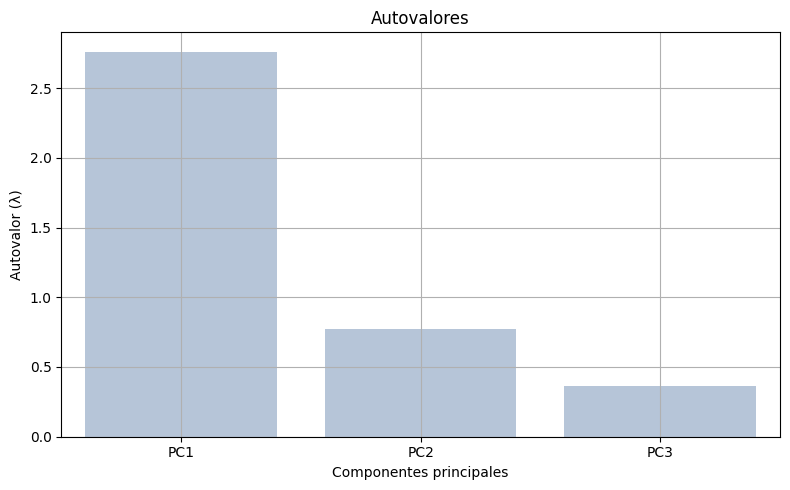

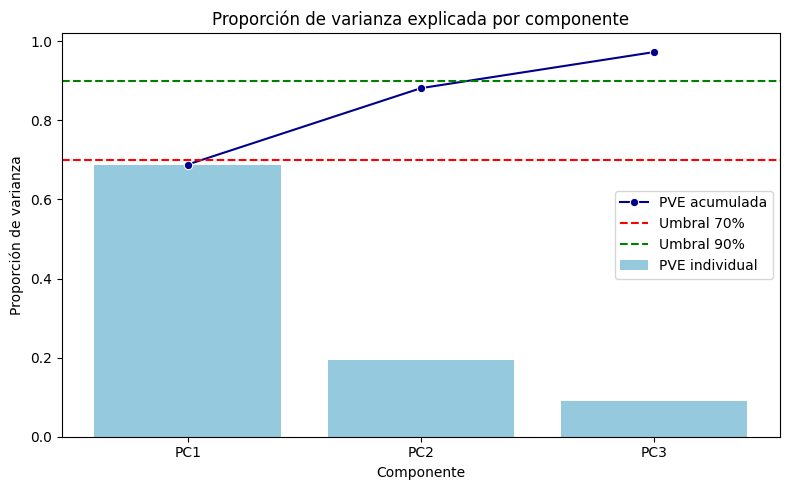

In [ ]:
# Varianza explicada
varianza = pca.explained_variance_
PVE = pca.explained_variance_ratio_
PVE_acum = np.cumsum(PVE)
componentes = [f'PC{i+1}' for i in range(len(PVE))]

# DataFrame para visualización
df_varianza = pd.DataFrame({
    'Componente': componentes,
    'Autovalor': varianza,
    'PVE': PVE,
    'PVE acumulada': PVE_acum
})

# Autovalores
plt.figure(figsize=(8, 5))
sns.barplot(x='Componente', y='Autovalor', data=df_varianza, color='lightsteelblue')
plt.title('Autovalores')
plt.ylabel('Autovalor (λ)')
plt.xlabel('Componentes principales')
plt.grid(True)
plt.tight_layout()
plt.show()


# Proporción de varianza explicada
plt.figure(figsize=(8, 5))
sns.barplot(x='Componente', y='PVE', data=df_varianza, color='skyblue', label='PVE individual')
sns.lineplot(x='Componente', y='PVE acumulada', data=df_varianza, marker='o', color='darkblue', label='PVE acumulada')
plt.axhline(0.7, color='red', linestyle='--', label='Umbral 70%')
plt.axhline(0.9, color='green', linestyle='--', label='Umbral 90%')
plt.title('Proporción de varianza explicada por componente')
plt.ylabel('Proporción de varianza')
plt.legend()
plt.tight_layout()
plt.show()

### <span style="color:#2F749F;"><strong>Ejercicio 2: Regresión Lineal Múltiple</strong></span>  

A partir de un conjunto de datos real sobre diamantes, realiza un análisis de regresión lineal múltiple para predecir el precio en función de variables numéricas relacionadas con sus características físicas.  

1. Carga el conjunto de datos `diamonds` desde la librería seaborn `load_dataset("diamonds")`.  
2. Selecciona las siguientes variables predictoras para el análisis:  
   - `carat`  
   - `depth`  
   - `table`  
   - `x`  
   - `y`  
   - `z`  
3. Define como variable respuesta el precio (`price`).  
4. Divide los datos en entrenamiento y prueba para validar el modelo.  
5. Ajusta un modelo de **Regresión Lineal Múltiple** usando `statsmodels.OLS()`.  
6. Imprime el resumen del modelo (coeficientes, significancia, R² ajustado, etc.).  
7. Evalúa el desempeño del modelo con métricas de ajuste como **RMSE** y **R²** en el conjunto de prueba.  
8. Grafica los valores reales vs. los valores predichos del precio para interpretar la calidad del ajuste.  

<p align="center">
    <img src="imgs\sp_3_e2.png" alt="sp_3_e2" width="600"  height="400">
</p>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Cargamos el dataset diamonds
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
price = diamonds['price']
diamonds = diamonds.drop(columns=["price"])
price.value_counts()


,count
price,
605,132
802,127
625,126
828,125
776,124
...,...
2769,1
9033,1
9027,1


In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   x        53940 non-null  float64 
 7   y        53940 non-null  float64 
 8   z        53940 non-null  float64 
dtypes: category(3), float64(6)
memory usage: 2.6 MB


In [6]:
diamonds_df=diamonds.copy()
diamonds_df.drop(columns=["cut","color","clarity"],inplace=True)
diamonds_df.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


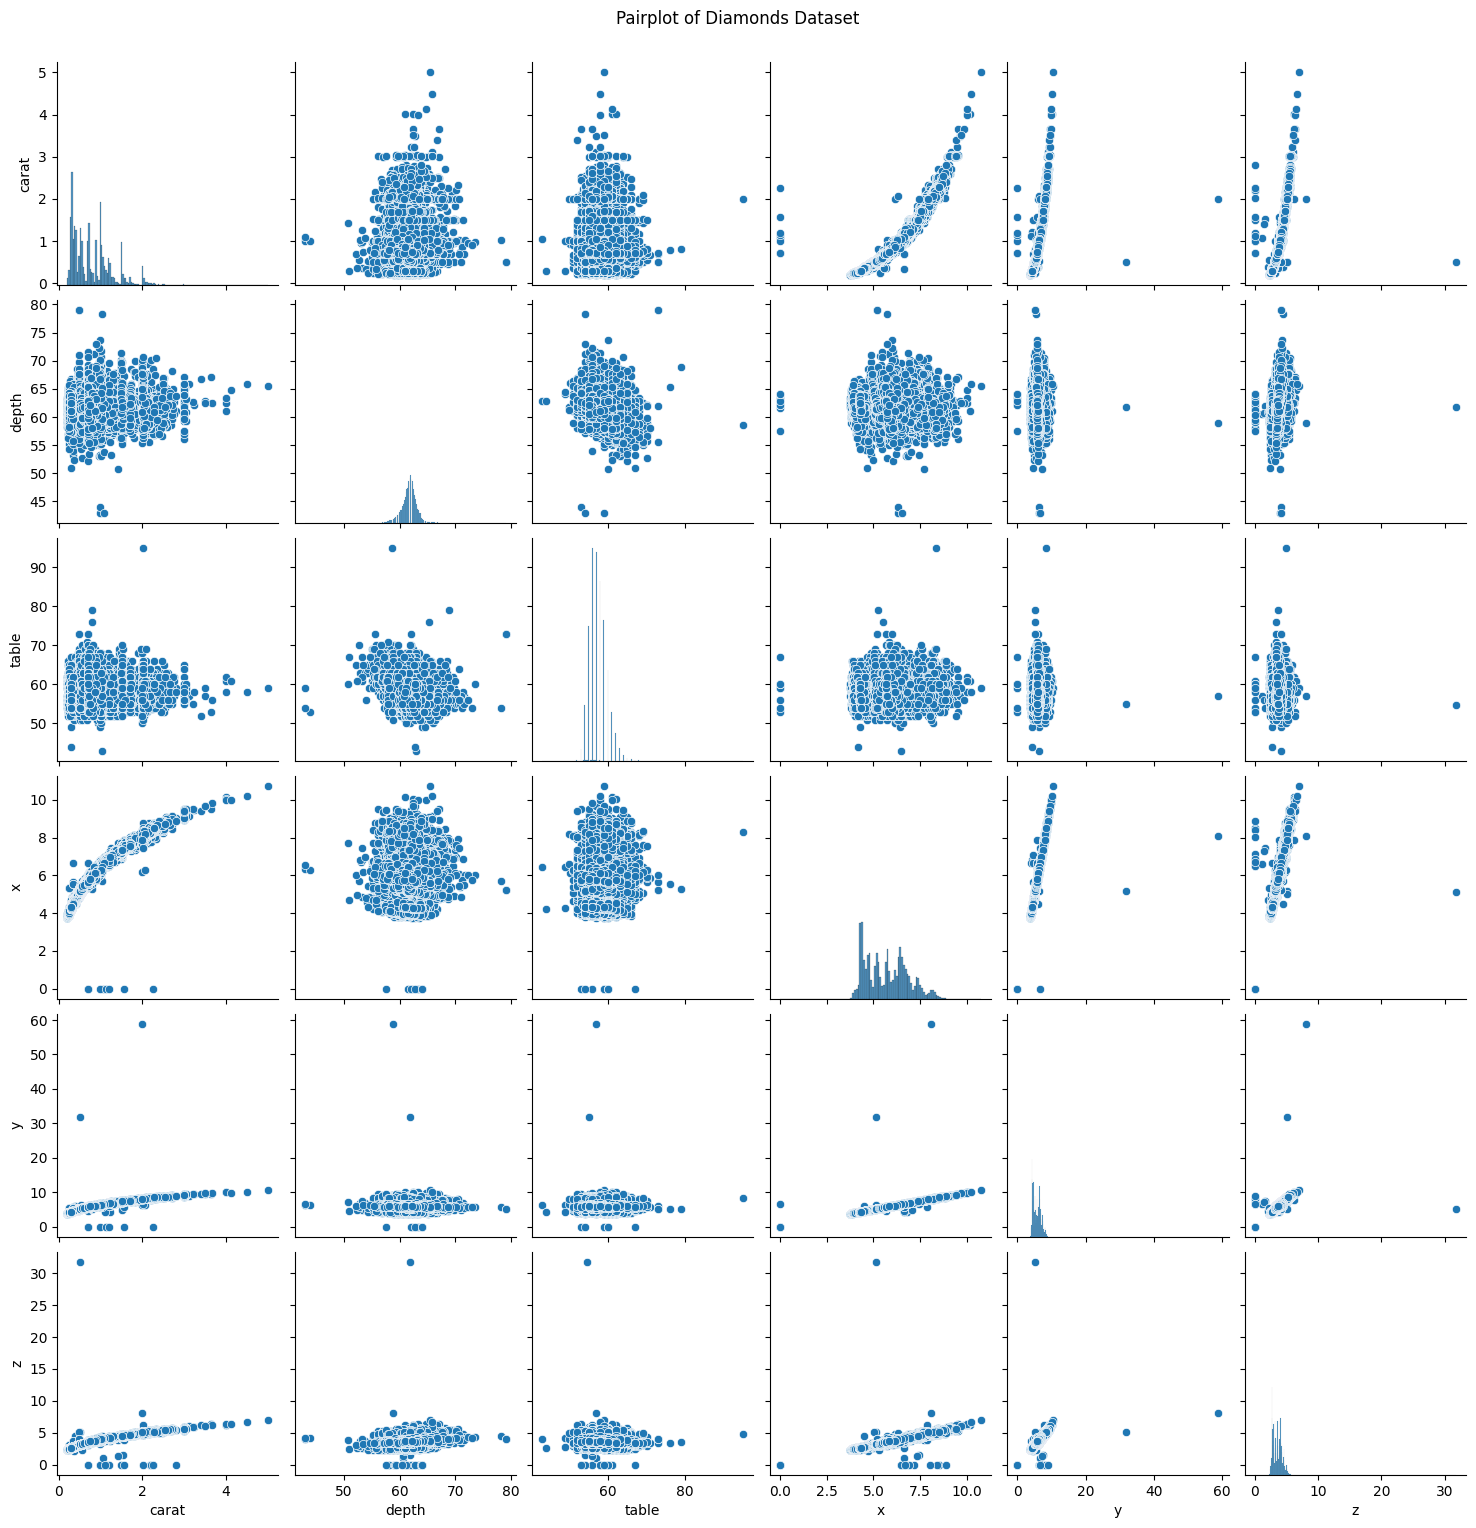

In [ ]:
# Graficamos un scatter pairplot
sns.pairplot(diamonds_df)
plt.suptitle('Pairplot of Diamonds Dataset', y=1.02)
plt.show()

In [7]:
#Dividimos entre datos de entrenamiento y prueba para validar el modelo
X_train, X_test, y_train, y_test = train_test_split(diamonds_df, price, test_size=0.2, random_state=42)

In [8]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 4.391e+04
Date:                Fri, 12 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:10:12   Log-Likelihood:            -3.7672e+05
No. Observations:               43152   AIC:                         7.534e+05
Df Residuals:                   43145   BIC:                         7.535e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.098e+04    497.170     42.192      0.0

In [ ]:
y_pred = model.predict(sm.add_constant(X_test))

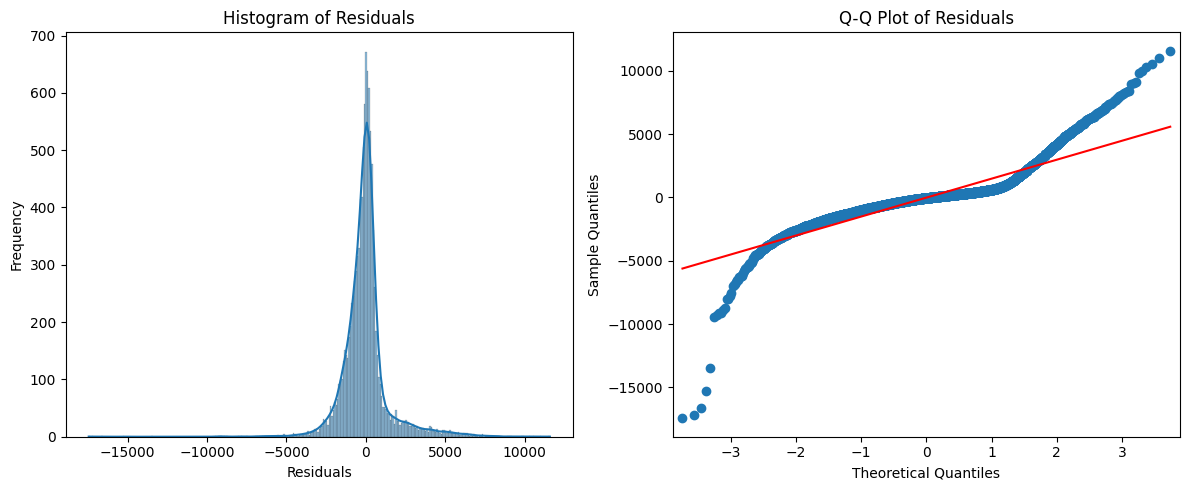

In [ ]:
# Normalidad: Histograma de residuos y Gráfico Q–Q en 1x2 matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de residuos
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

# Gráfico Q–Q
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

Podemos apreciar una distribucion normal o acampanada lo puede indicar Normalidad y en Q-Q Plot de residuales se evidencia una línea diagonal, aun que quedan bastantes valores por fuera, por ende no es tan concluyente de que haya normalidad en los residuales

In [1]:
#Imprime el resumen del modelo (coeficientes, significancia, R² ajustado, etc.).
print(model.summary())

NameError: name 'model' is not defined

In [10]:
# Evaluate the model's performance with RMSE and R² metrics on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nRMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 1497.39
R²: 0.86


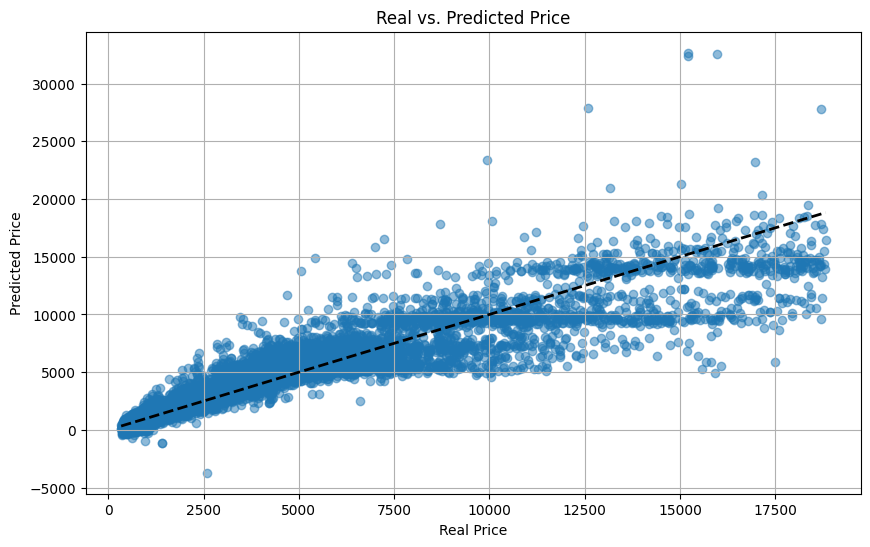

In [11]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for reference
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Real vs. Predicted Price')
plt.grid(True)
plt.show()